#  Import necessary Libraries 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
import os, sys
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from mlxtend.classifier import StackingClassifier
import warnings
warnings.simplefilter('ignore')


#  load and review data 

In [3]:
parkinson_df = pd.read_csv('Data - Parkinsons')

In [4]:
# Display the first five of datase
parkinson_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
parkinson_df.head().transpose()

,0,1,2,3,4
name,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3,phon_R01_S01_4,phon_R01_S01_5
MDVP:Fo(Hz),119.992,122.4,116.682,116.676,116.014
MDVP:Fhi(Hz),157.302,148.65,131.111,137.871,141.781
MDVP:Flo(Hz),74.997,113.819,111.555,111.366,110.655
MDVP:Jitter(%),0.00784,0.00968,0.0105,0.00997,0.01284
MDVP:Jitter(Abs),7e-05,8e-05,9e-05,9e-05,0.00011
MDVP:RAP,0.0037,0.00465,0.00544,0.00502,0.00655
MDVP:PPQ,0.00554,0.00696,0.00781,0.00698,0.00908
Jitter:DDP,0.01109,0.01394,0.01633,0.01505,0.01966
MDVP:Shimmer,0.04374,0.06134,0.05233,0.05492,0.06425


# Description of the columns:
name - ASCII subject name and recording number 
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency 
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several  measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,S himmer:DDA - Several measures of variation in amplitude 
NHR,HNR - Two measures of ratio of noise to tonal components in the voice status -
Health status of the subject (one) - Parkinson's, (zero) - healthy 
RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation  

In [6]:
parkinson_df.drop(['name'], axis=1, inplace=True)

In [7]:
parkinson_df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

# Exploratory data analysis
#*Shape
#*Meta info
#*Descriptive stats
#*Distributions
#*Correlations

In [8]:
# Check number of columns and rows in data frame
parkinson_df.shape

(195, 23)

In [8]:
# we obeserve that 195 rows and 23 columns in the given dataset.

In [9]:
# since column names are big, better to change to small for plots and calculation
parkinson_df.columns=['Fo(Hz)', 'Fhi(Hz)', 'Flo(Hz)', 'Jitter(%)',
       'Jitter(Abs)', 'RAP', 'PPQ', 'DDP',
       'Shimmer', 'Shimmer(dB)', 'APQ3', 'APQ5',
       'APQ', 'DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']

In [10]:
parkinson_df.info() # meta info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
Fo(Hz)         195 non-null float64
Fhi(Hz)        195 non-null float64
Flo(Hz)        195 non-null float64
Jitter(%)      195 non-null float64
Jitter(Abs)    195 non-null float64
RAP            195 non-null float64
PPQ            195 non-null float64
DDP            195 non-null float64
Shimmer        195 non-null float64
Shimmer(dB)    195 non-null float64
APQ3           195 non-null float64
APQ5           195 non-null float64
APQ            195 non-null float64
DDA            195 non-null float64
NHR            195 non-null float64
HNR            195 non-null float64
status         195 non-null int64
RPDE           195 non-null float64
DFA            195 non-null float64
spread1        195 non-null float64
spread2        195 non-null float64
D2             195 non-null float64
PPE            195 non-null float64
dtypes: float64(22), int64(1)
memory usage: 35.2 KB


In [17]:
#*The dataset is of shape (195,23)
#*No sign of missing values
#*All the columns are read as continuous except the status

In [11]:
 # descriptive statistics of each of the attributes
parkinson_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


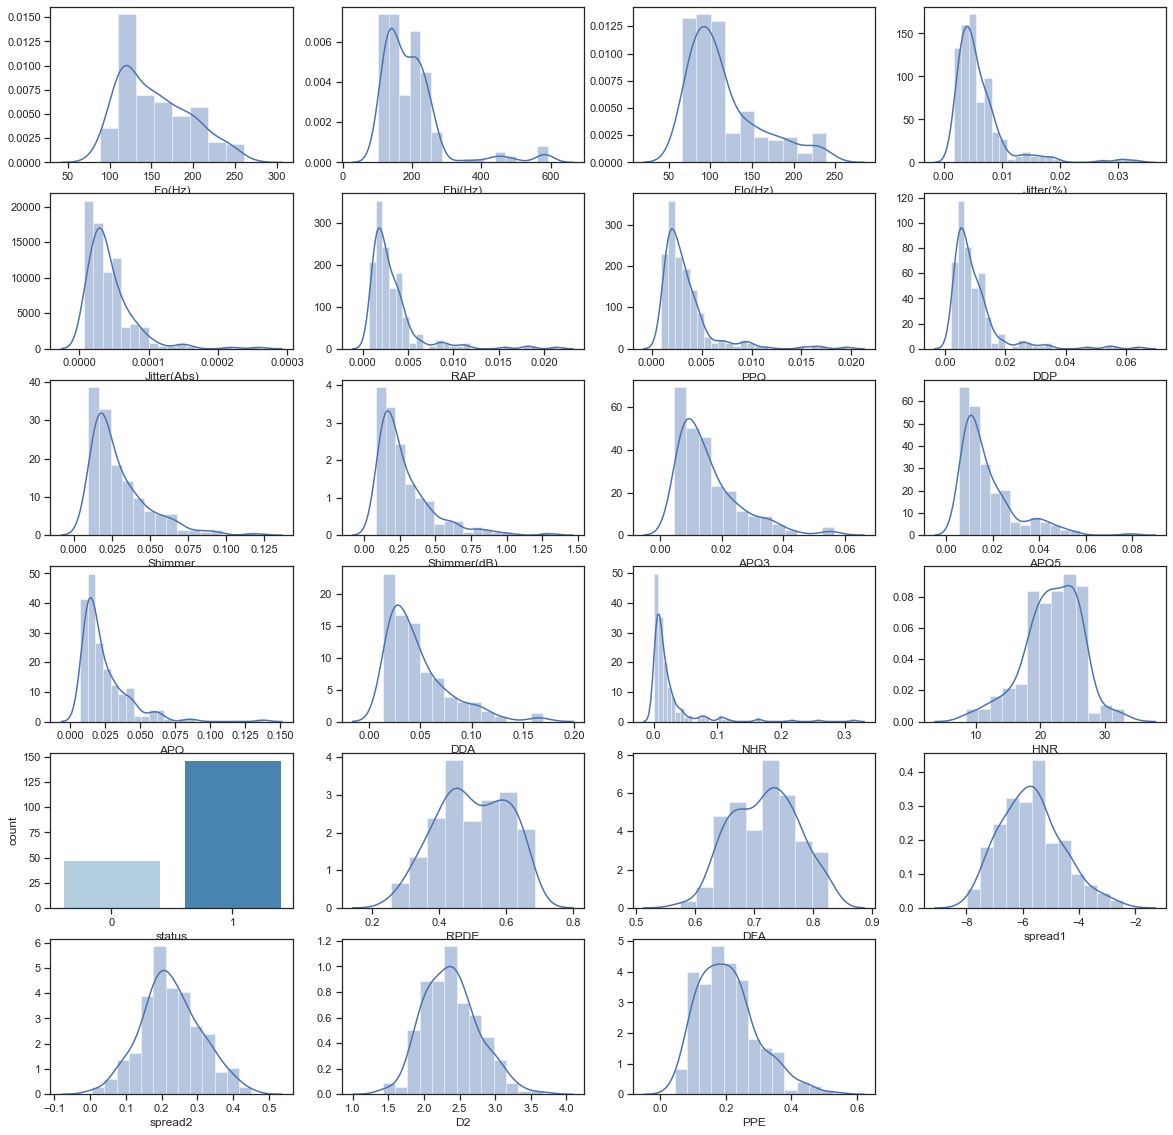

In [11]:
# Data distribution in each attribute
plt.figure(figsize=(20,20))
pos=1
for feature in parkinson_df.columns:
    plt.subplot(6,4,pos)
    if feature in ['Fo(Hz)', 'Fhi(Hz)', 'Flo(Hz)', 'Jitter(%)',
       'Jitter(Abs)', 'RAP', 'PPQ', 'DDP',
       'Shimmer', 'Shimmer(dB)', 'APQ3', 'APQ5',
       'APQ', 'DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']:# Plot histogram for all the continuous columns
        sns.distplot(parkinson_df[feature], kde=True)
    else:
        sns.countplot(parkinson_df[feature],palette='Blues')
    pos+=1

In [12]:
parkinson_df.corr()# Correlation among the attribute

,Fo(Hz),Fhi(Hz),Flo(Hz),Jitter(%),Jitter(Abs),RAP,PPQ,DDP,Shimmer,Shimmer(dB),...,DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


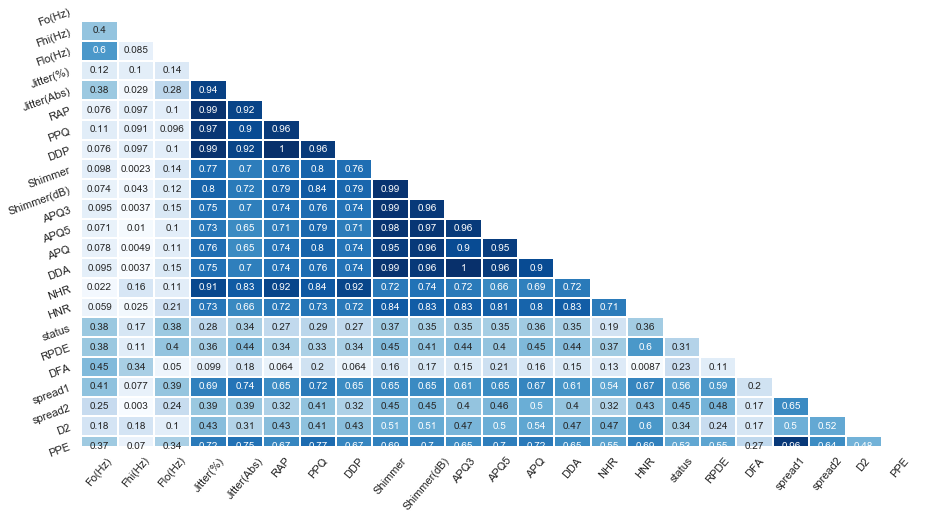

In [13]:
# Correlation among the attribute
corr = abs(parkinson_df.corr())
lower_triangle=np.tril(corr, k=-1)
mask = lower_triangle == 0
plt.figure(figsize = (15,8))
sns.set_style(style = 'white')
sns.heatmap(lower_triangle, center=0.5, cmap='Blues', annot=True, xticklabels=corr.index, yticklabels=corr.columns, 
            cbar=False, linewidths=1, mask=mask)
plt.xticks(rotation=50)
plt.yticks(rotation=20)
plt.show()

C:\Users\Sujana\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sujana\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


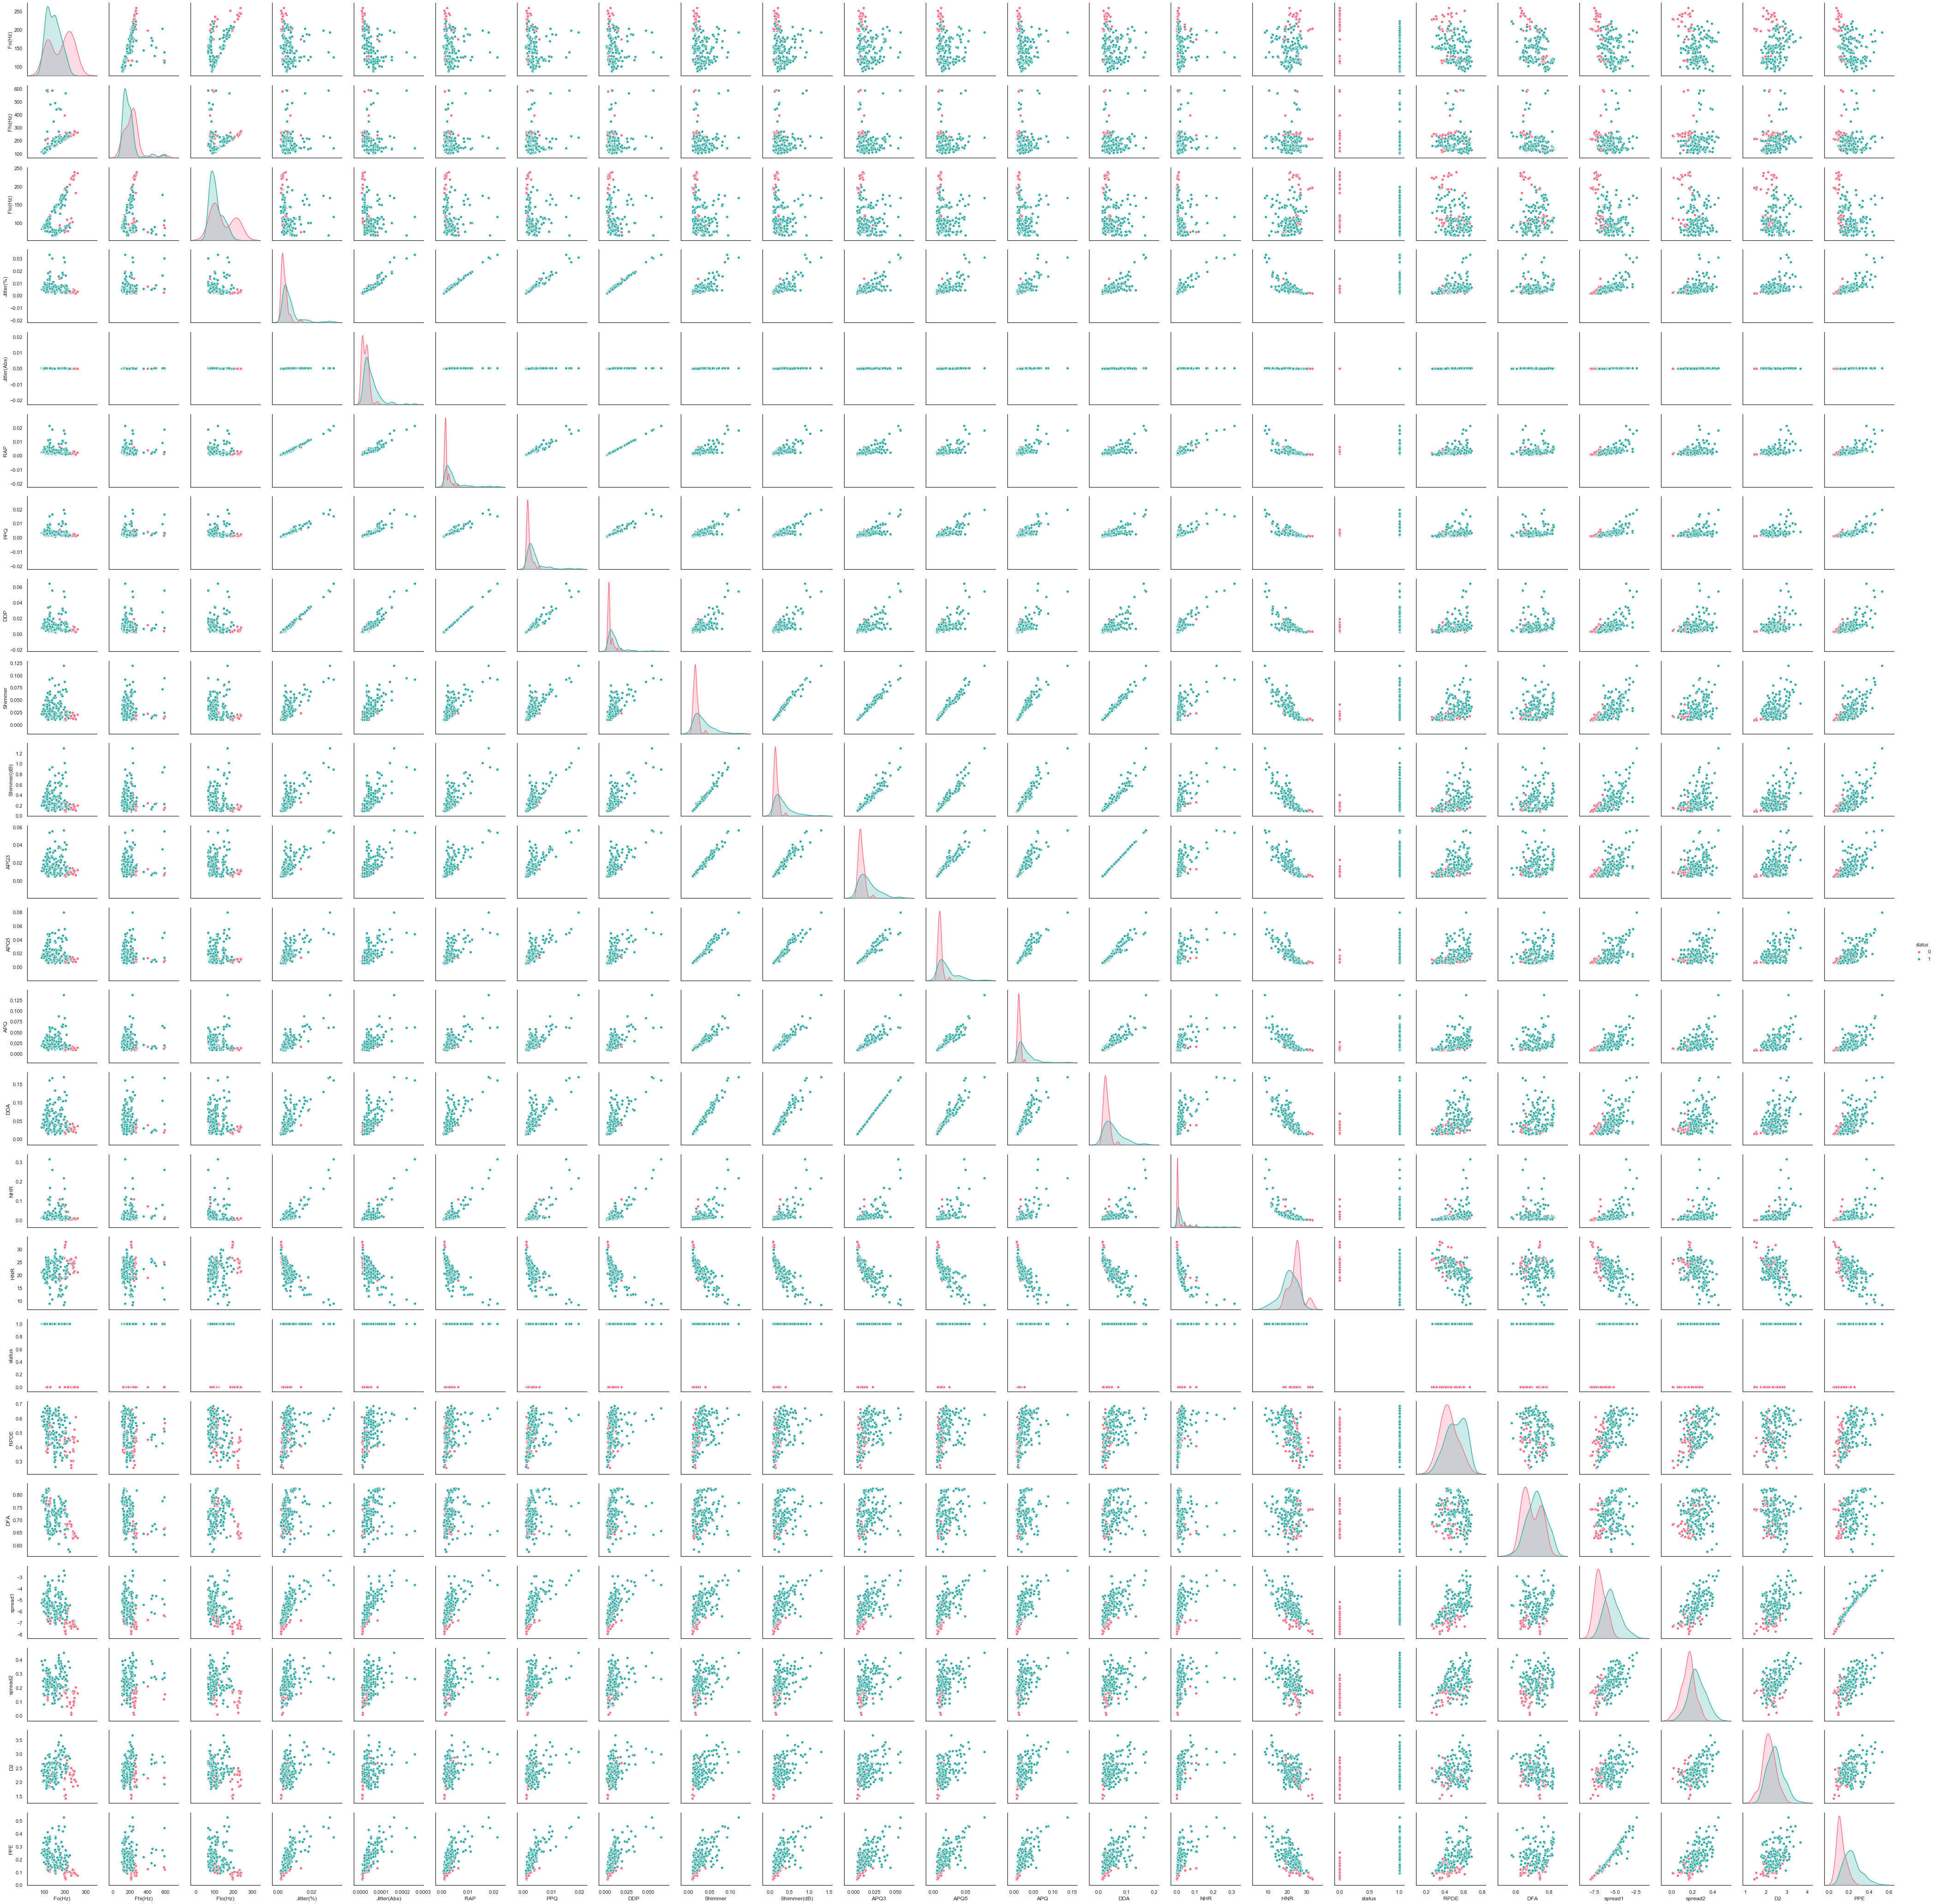

In [32]:
sns.pairplot(parkinson_df, hue = 'status', diag_kind='kde', palette='husl') 
plt.show()

In [ ]:
# Fhi and NHR having less correlation with respect to status so we can drop these two features
# spread1 and PPE have high correlation with respect to status.



# Data preparation:

Seperate Predictors from the target
Split the data into test and train sets
check null values
check outliers

In [13]:
X = parkinson_df.drop(['Fhi(Hz)','NHR','status'],axis=1)
y = parkinson_df['status']

# Split data into test and train in the ratio 70:30

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [15]:
parkinson_df['status'].value_counts().sort_index()

0     48
1    147
Name: status, dtype: int64

In [41]:
# most are having parkinson's disease. ratio is almost 1:3.

In [16]:
parkinson_df[parkinson_df.isnull().any(axis=1)] # to check the missing values

,Fo(Hz),Fhi(Hz),Flo(Hz),Jitter(%),Jitter(Abs),RAP,PPQ,DDP,Shimmer,Shimmer(dB),...,DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [43]:
# there are no missing values in the dataset


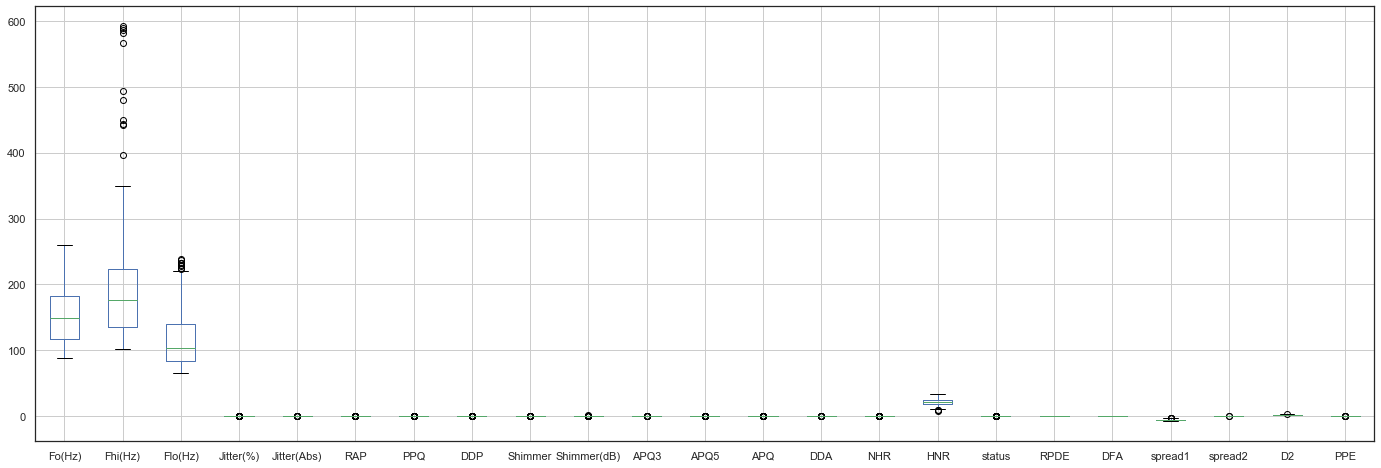

In [20]:
parkinson_df.boxplot(figsize=(24,8))# to check the outliers

In [45]:
# from the above boxplot we can observe that there are few outliers, and these will not affect the model.

# Using different models:

In [17]:
# Since we will be using multiple models using the same data, thhe following is a user defined function for that purpose 
def fit_n_print(model, X_train, X_test, y_train, y_test):  
    from sklearn import metrics
    
    model.fit(X_train, y_train)   

    pred = model.predict(X_test)  

    score = round(model.score(X_test, y_test), 3)   

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()  
    recall = round(tp/(tp+fn), 3)   
    precision = round(tp/(tp+fp), 3)  
    specificity =round(tn/(tn+fp),3) 
    f1_score =  round(2*precision*recall/(precision + recall), 3)
    
    return score, recall, precision, specificity, f1_score  

In [18]:
lr = LogisticRegression(solver = 'liblinear')  
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr, X_train, X_test, y_train, y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn, X_train, X_test, y_train, y_test )

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb, X_train, X_test, y_train, y_test )

svm = SVC(gamma = 'auto', kernel= 'poly', degree=2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm, X_train, X_test, y_train, y_test )

In [19]:
result = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM'],
                          'Accuracy': [ lr_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ],
                          'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                          'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                          'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                          'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
result

,Model,Accuracy,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.814,0.936,0.846,0.333,0.889
1,KNN,0.864,0.872,0.953,0.833,0.911
2,Naive Bayes',0.644,0.553,1.000,1.000,0.712
3,SVM,0.814,0.872,0.891,0.583,0.881


# Meta classifier:

In [33]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.76 (+/- 0.01) [KNN]
Accuracy: 0.82 (+/- 0.05) [Random Forest]
Accuracy: 0.69 (+/- 0.02) [Naive Bayes]
Accuracy: 0.84 (+/- 0.06) [StackingClassifier]


In [ ]:
# Stacking classifier has 84% accuracy.

# XGBClassifier:

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=1)# split the data in to train and test set
model=XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [36]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
XGB = accuracy_score(y_test, y_pred)
print('XGB accuracy_score:',XGB)

XGB accuracy_score: 0.8813559322033898


# Bagging Classifier:

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [23]:
bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)

In [24]:
test_pred = bgcl.predict(X_test)
bgcl.score=bgcl.score(X_test , y_test)
print('bagging classifier score:',bgcl.score)

bagging classifier score: 0.864406779661017


# Ensembl model:
#*Random forest :

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [26]:
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X_train, y_train)

In [27]:
test_pred = rfcl.predict(X_test)
rfcl.score=rfcl.score(X_test ,y_test)
print('random forest accuracy:', rfcl.score)


random forest accuracy: 0.7966101694915254


In [37]:
# models accuracies:
Accuracy = {'Logistic Regression': round(lr_accuracy*100), 'Naive Bayes': round(nb_accuracy*100), 'K-Nearest Neighbors': round(knn_accuracy*100), 'SVM':round(svm_accuracy*100),'random forest':round(rfcl.score*100),'bagging classifier':round(bgcl.score*100), 'XGB classifier': round(XGB*100)}

print("Different Model's Accuracy:")
print (Accuracy)


Different Model's Accuracy:
{'Logistic Regression': 81.0, 'Naive Bayes': 64.0, 'K-Nearest Neighbors': 86.0, 'SVM': 81.0, 'random forest': 80.0, 'bagging classifier': 86.0, 'XGB classifier': 88.0}


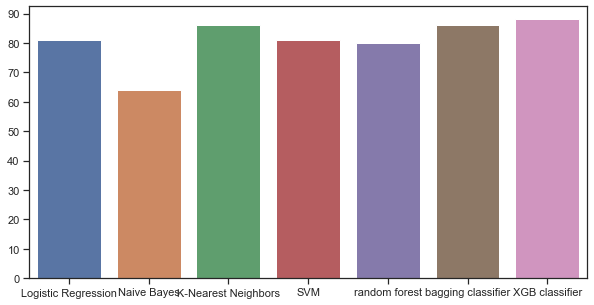

In [41]:
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
sns.barplot(x=list(Accuracy.keys()), y= list(Accuracy.values()))


In [ ]:
#In this assignment we learned to detect the presence of Parkinson’s Disease in individuals using various factors.
#We used different models, based on the above barplot  we can see that among all models XGB classifier has better accuracy i.e. 88%
# so XGB classifer seems to be the go-to model for this dataset.